# Topic Modeling with Twitter Data

The modeling part of the project will use k-means clustering to identify common topics in the competitors' Twitter content. K-means clustering is a simple and unsupervised machine learning algorithm that can be used to group data points into clusters. In this case, the data points will be the tweets from the competitors, and the clusters will represent the different topics that the competitors talk about.

## Load Data

In [7]:
# for loading data
import pandas as pd
import pickle

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# kmeans model
from sklearn.cluster import KMeans

In [2]:
# load the preprocessed data
df = pd.read_pickle("pickle_files/preprocessed_dataset.pkl")

In [3]:
df

,user_id,user_name,date,text,tweet_id,is_reply,replies,retweets,quotes,cleaned_text
0,72579390,innoget,Fri Feb 26 11:35:21 +0000 2016,#Global #Biotech Reagents Market 2016 Industry...,703181551727570944,False,0,0,0,global biotech reagent market industry share r...
1,72579390,innoget,Thu Feb 25 10:15:16 +0000 2016,Tech Transfer Office in #Ohio #University help...,702799011187658752,False,0,0,0,tech transfer office ohio university help staf...
2,72579390,innoget,Wed Feb 24 12:10:05 +0000 2016,What’s your point regarding IP protection? Doe...,702465520109559808,False,0,0,0,point regard protection benefit market new pro...
3,72579390,innoget,Tue Feb 23 15:15:17 +0000 2016,New article about #Samsung and its investment ...,702149739492597761,False,0,0,0,new samsung investment biotechnology aim becom...
4,72579390,innoget,Mon Feb 22 12:01:04 +0000 2016,Want to success in Tech Transfer? Visit our bl...,701738474878144513,False,0,0,0,want success tech transfer visit new ten step ...
...,...,...,...,...,...,...,...,...,...,...
4201,72579390,innoget,Thu Jun 16 09:42:40 +0000 2016,#Science2society starts to boost #innovation e...,743378248818638848,False,0,5,0,science start boost innovation efficiency acro...
4202,72579390,innoget,Mon Jun 13 10:08:17 +0000 2016,#Science2society starts to boost innovation ef...,742297531594465280,False,0,3,0,science start boost innovation efficiency acro...
4203,72579390,innoget,Wed Apr 27 08:04:02 +0000 2016,@innoget is attending the Open Innovation Summ...,725234035593744384,False,0,1,0,attend open innovation summit london hold open...
4204,72579390,innoget,Mon Mar 21 08:25:54 +0000 2016,IoT Development Enters the Open Innovation Cra...,711831185161375744,False,0,0,0,iot development enter open innovation craze


## Vectorization

The vectorization step is used to convert the text data into a numerical representation that can be used by machine learning algorithms. In this case, we will use the TfidfVectorizer, which assigns weights to each word based on its frequency in a document and its rarity across the entire corpus. To ensure that the vectorization process includes only moderately frequent words that have a balance between being too rare or too common, we specify the minimum and maximum threshold for a word's document frequency.
* `min_df=0.05`: words that appear in less than 5% of the documents will be ignored.
* `max_df=0.95`: ords that appear in more than 95% of the documents will be ignored.

In [4]:
# create tf-idf transformer instance
tfidf_vectorizer = TfidfVectorizer(min_df=0.05, max_df=0.95)

# fit & transform
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# store the frequency matrix
data_tfidf = tfidf_matrix.toarray()

# store the feature names
words = tfidf_vectorizer.get_feature_names_out().tolist()

In [5]:
print("Shape:", data_tfidf.shape)

Shape: (4131, 25)


The `Shape: (4131, 25)` indicates that there are 4,131 documents in the corpus and 25 features in the vocabulary. In other words, each document is represented by a vector of 25 numbers, where each number represents the TF-IDF score for a particular word in the vocabulary.

## K-means Clustering for Topic Analysis

After vectorizing the textual data, the next step is to apply **K-means clustering**, a popular unsupervised machine learning algorithm, to identify distinct clusters of documents based on their feature representations. Each document in the dataset will be assigned to one of the K clusters based on its proximity to the cluster centroids.

To determine the optimal number of clusters in k-means clustering, we use the elbow method. The elbow method works by plotting the **within-cluster sum of squares (WCSS)** for different values of k. The WCSS is a measure of the variation within each cluster. The elbow point represents the number of clusters at which the WCSS reduction significantly slows down, forming a visible bend in the plot. This point is often considered the optimal number of clusters.

Based on domain knowledge and the prior experience of ResearchPreneurs and the team, we think the topic numbers should be around **2 to 4**. If we have too many clusters, then the clusters will be too small and they will not be very meaningful. If we have too few clusters, then we may not be able to capture all of the different themes or topics in the tweets. Therefore, we ran k-means clustering with k-values from 1 to 5.

In [8]:
# define a range of values for k
k_values = range(1,5)

# a list to store WCSS values
wcss = []

# iterate over different values of K on the vectorized data
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters = k, random_state = 3)
    kmeans.fit(tfidf_matrix)
    
    # calculate the WCSS
    wcss.append(kmeans.inertia_)

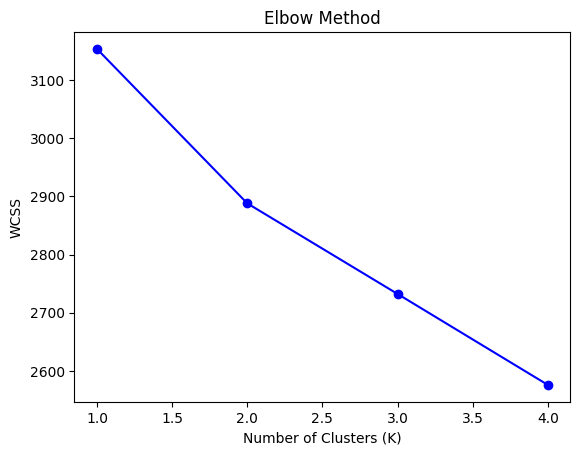

In [9]:
# plot the WCSS values
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The elbow plot showed that the elbow point was at k=2, which suggests that there are two main themes or topics in the tweets. We now perform the K-means clusterning with k=2 to retrieve the cluster labels as well as common words within each cluster.

In [10]:
# perform K-means clustering with K=2
kmeans = KMeans(n_clusters = 2, random_state = 2)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=2, random_state=2)

In [11]:
# retrieve the common words in each cluser
common_words = kmeans.cluster_centers_.argsort()[:,-1:-8:-1]

for num, centroid in enumerate(common_words):
  print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : innovation, open, webinar, technology, late, new, research
1 : challenge, new, technology, research, seek, solution, look


We can also look at the word cloud for each topic to identify the patterns or theme of them. In the context of tweets, where the text is often concise and limited to a small number of characters, it is indeed more appropriate to limit the number of words displayed in the word cloud. Hence, we setting max_words to a lower value (15) to ensure that the most relevant and frequent words are captured in the visualization. 

In [12]:
# assign the topic (cluster) to df
topic_number = kmeans.labels_
df['topic_number'] = topic_number

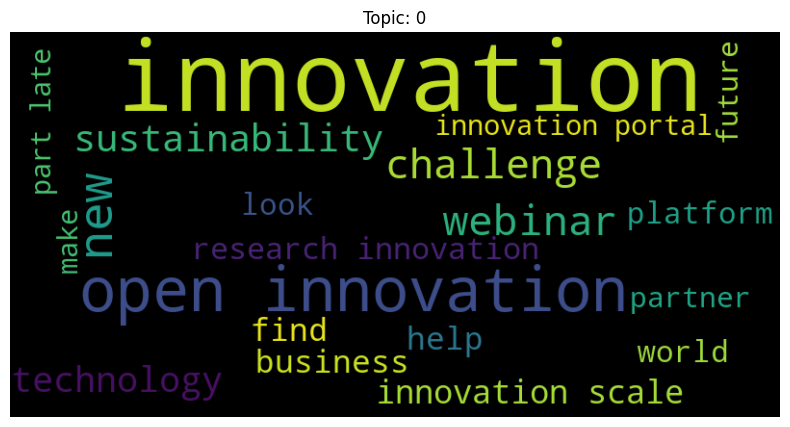

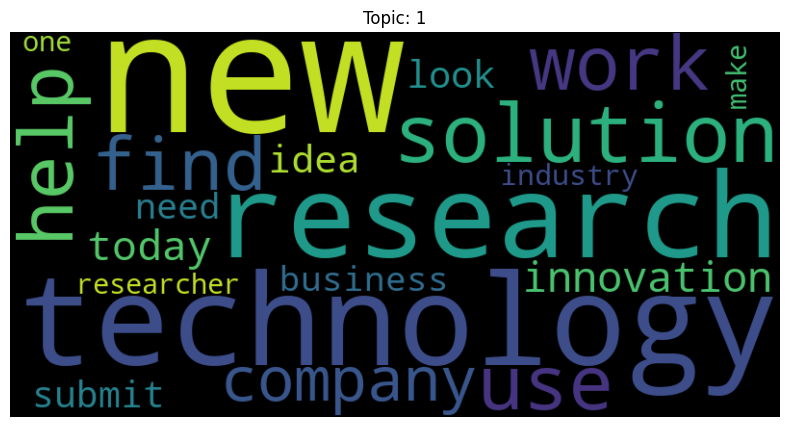

In [13]:
topics = [0,1]
for topic in topics:
    # filter the DataFrame to select the data points belonging to the current cluster
    cluster_data = df[df['topic_number'] == topic]
    
    # combine the cleaned text from all data points in the cluster
    all_words = ' '.join(cluster_data['cleaned_text'])
    
    # create a WordCloud object and generate the word cloud
    wordcloud = WordCloud(width = 800, height = 400, random_state = 3, max_words = 20).generate(all_words)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic: {topic}')
    plt.axis('off')
    plt.show()

Cluster 0 is characterized by words related to exploring new ideas, developing new products or services, and finding new ways to solve problems. Cluster 1 is characterized by words related to overcoming challenges, finding solutions to problems, and improving existing products or services. Therefore, we define the names for the clusters as follows:

**Cluster 0: Innovation Exploration** 

**Cluster 1: Challenges and Solutions**

Finally, we map the topic names to the DataFrame

In [14]:
# assign topic names
topic_names = ['Innovation Exploration', 'Challenges and Solutions']
df['topic_name'] = [topic_names[number] for number in topic_number]

In [15]:
# export to pickle
df.to_pickle("pickle_files/topic_dataset.pkl")
print("DataFrames exported successfully.")

DataFrames exported successfully.


In [16]:
# export to CSV
df.to_csv("csv_files/topic_dataset.csv", index=False)
print("DataFrames exported successfully.")

DataFrames exported successfully.
